In [1]:
# Import libraries
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [2]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype('float64').head(20000)
y = mnist.target.astype('int64').head(20000)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=546)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
def knn(X_train, y_train, X_test, y_test, n_neighbors):
    """
    Implements KNN with a given number of neighbors
    Returns the accuracy of the KNN model
    """
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [5]:
k_list = [1,2,3,4,5,10,20,30,40,50,60,70,80,90,100]
print("KNN with different numbers of nearest neighbors:")
for k in k_list:
    acc = knn(X_train_scaled, y_train, X_test_scaled, y_test, k)
    print(f"Accuracy with {k} neighbors: {acc}")

KNN with different numbers of nearest neighbors:
Accuracy with 1 neighbors: 0.9245
Accuracy with 2 neighbors: 0.9165
Accuracy with 3 neighbors: 0.92525
Accuracy with 4 neighbors: 0.92375
Accuracy with 5 neighbors: 0.92
Accuracy with 10 neighbors: 0.91725
Accuracy with 20 neighbors: 0.90775
Accuracy with 30 neighbors: 0.90625
Accuracy with 40 neighbors: 0.89925
Accuracy with 50 neighbors: 0.89375
Accuracy with 60 neighbors: 0.88925
Accuracy with 70 neighbors: 0.8855
Accuracy with 80 neighbors: 0.8795
Accuracy with 90 neighbors: 0.87325
Accuracy with 100 neighbors: 0.87075


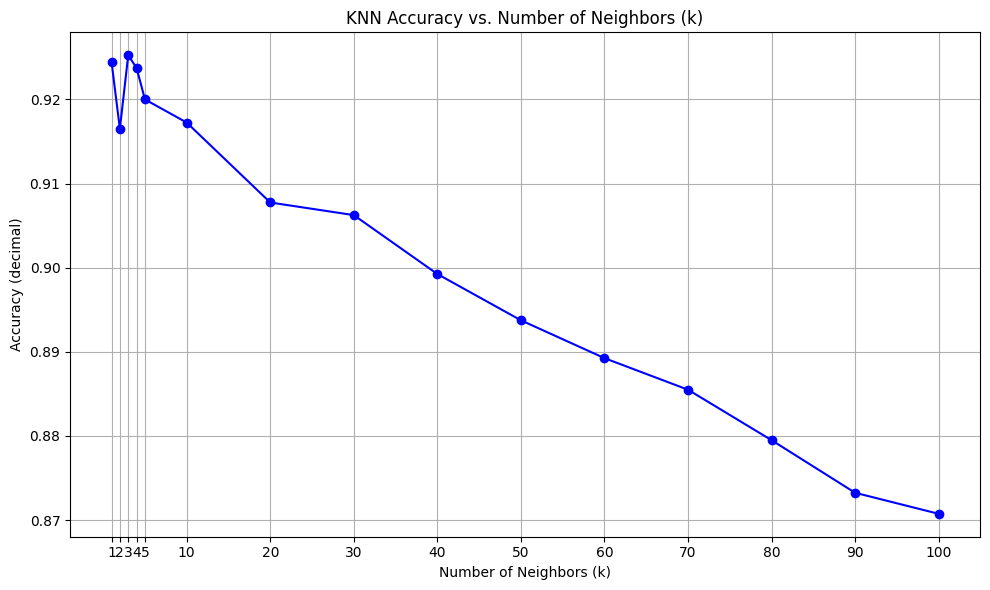

In [7]:
import matplotlib.pyplot as plt

# Given data
k_values = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
accuracies = [
    0.9245, 0.9165, 0.92525, 0.92375, 0.92, 0.91725, 0.90775,
    0.90625, 0.89925, 0.89375, 0.88925, 0.8855, 0.8795, 0.87325, 0.87075
]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('KNN Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy (decimal)')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()

plt.show()


In [9]:
def knn_pca(X_train, y_train, X_test, y_test, n_dimensions, n_neighbors = 5):
    """
    Implements KNN with dimensionality reduction from PCA
    Returns the accuracy of the KNN model
    """
    # Implement PCA for dimensionality reduction
    pca = PCA(n_components = n_dimensions)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Implement KNN with PCA
    knn_pca = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn_pca.fit(X_train_pca, y_train)
    y_pred_pca = knn_pca.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred_pca)
    return accuracy

In [10]:
dim_list = [10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,784]

print("\nKNN with PCA for different numbers of dimensions:")
for dim in dim_list:
    acc_pca = knn_pca(X_train_scaled, y_train, X_test_scaled, y_test, dim)
    print(f"Accuracy with PCA ({dim} dimensions): {acc_pca}")


KNN with PCA for different numbers of dimensions:
Accuracy with PCA (10 dimensions): 0.895
Accuracy with PCA (20 dimensions): 0.93125
Accuracy with PCA (30 dimensions): 0.93725
Accuracy with PCA (40 dimensions): 0.9445
Accuracy with PCA (50 dimensions): 0.94525
Accuracy with PCA (60 dimensions): 0.9435
Accuracy with PCA (70 dimensions): 0.9395
Accuracy with PCA (80 dimensions): 0.94075
Accuracy with PCA (90 dimensions): 0.942
Accuracy with PCA (100 dimensions): 0.9405
Accuracy with PCA (200 dimensions): 0.93375
Accuracy with PCA (300 dimensions): 0.9255
Accuracy with PCA (400 dimensions): 0.923
Accuracy with PCA (500 dimensions): 0.9215
Accuracy with PCA (600 dimensions): 0.91975
Accuracy with PCA (700 dimensions): 0.92
Accuracy with PCA (784 dimensions): 0.92


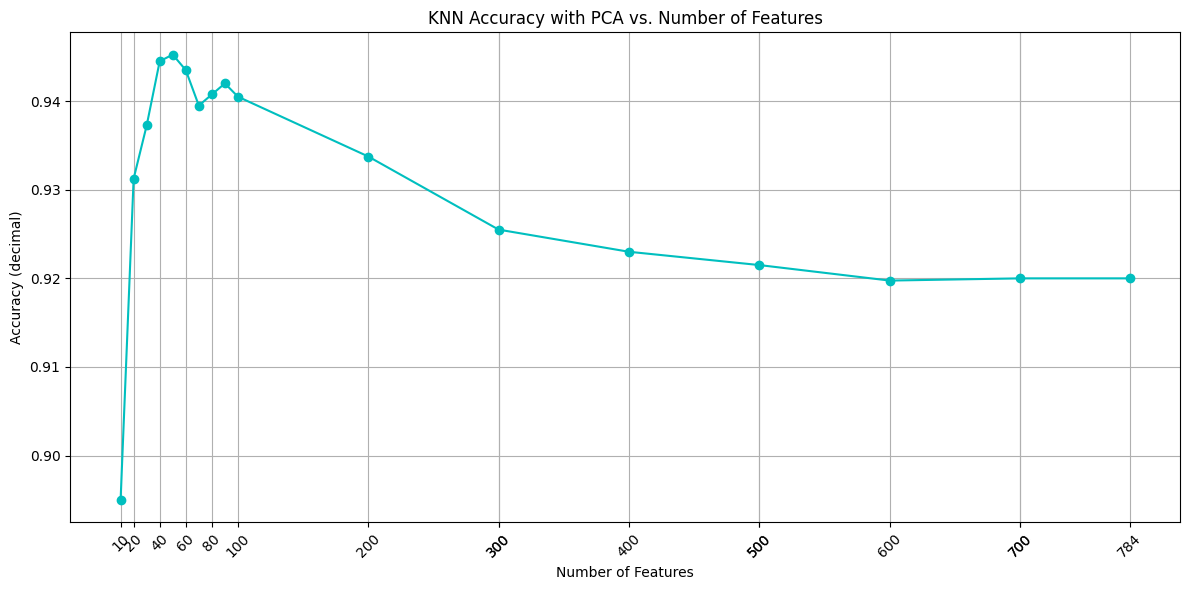

In [11]:
import matplotlib.pyplot as plt

# Given data for PCA accuracies
pca_features = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 784]
pca_accuracies = [
    0.895, 0.93125, 0.93725, 0.9445, 0.94525, 0.9435, 0.9395,
    0.94075, 0.942, 0.9405, 0.93375, 0.9255, 0.923, 0.9215, 0.91975, 0.92, 0.92
]

# Plotting the graph
plt.figure(figsize=(12, 6))
plt.plot(pca_features, pca_accuracies, marker='o', linestyle='-', color='c')

# Set x-axis ticks: we want more granularity for larger feature numbers
# Generate custom ticks such that ticks for 10-100 are less crowded
xticks_major = pca_features[1::2]  # Take every second element from 20 to 100
xticks_minor = pca_features[0:1] + pca_features[10:]  # Take the first element (10) and elements from 200 to 784
xticks = sorted(xticks_major + xticks_minor)

plt.title('KNN Accuracy with PCA vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy (decimal)')
plt.xticks(xticks, rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit all elements


plt.show()



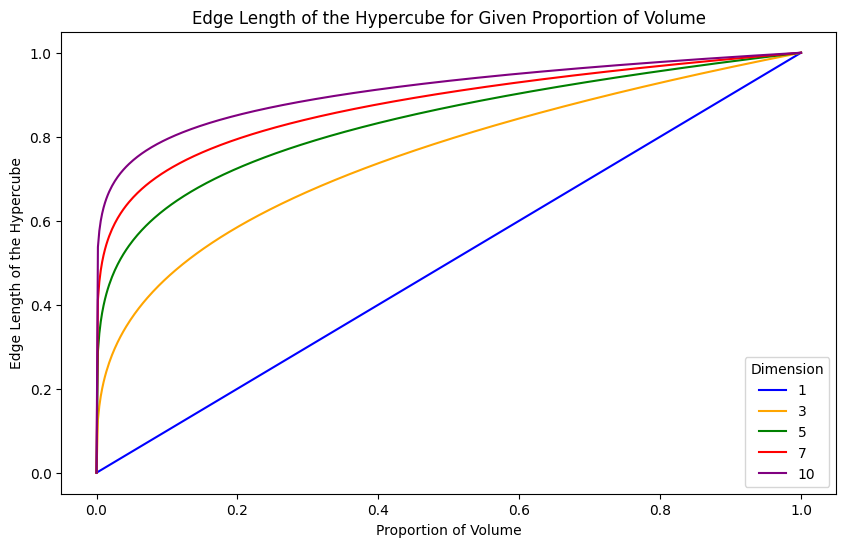

In [19]:

def edge_length_for_volume_proportion(p, n):
    # Calculate the edge length needed for a hypercube to contain a proportion p of the volume
    # The proportion of volume in an n-dimensional hypercube as a function of edge length is p = edge_length^n
    # Therefore, the edge length for a given proportion of volume is the nth root of p
    return p ** (1/n)
# Adjusting the color of the lines to match the order specified: purple, red, green, orange, blue.

# Create the plot
plt.figure(figsize=(10, 6))

# The proportions and dimensions to be plotted
proportions = np.linspace(0, 1, 500)
dimensions = [1,3,5,7,10] # Ordered by dimension
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Plot each dimension's curve with the corresponding color
for n, color in zip(dimensions, colors):
    edge_lengths = [edge_length_for_volume_proportion(p, n) for p in proportions]
    plt.plot(proportions, edge_lengths, label=f'{n}', color=color)
# Create a custom legend
handles, labels = plt.gca().get_legend_handles_labels()
# Reverse the order for the legend
plt.legend(reversed(handles), reversed(labels), title="Dimension", loc='lower right')

plt.title('Edge Length of the Hypercube for Given Proportion of Volume')
plt.xlabel('Proportion of Volume')
plt.ylabel('Edge Length of the Hypercube')
plt.legend(title="Dimension")
plt.grid(False)
plt.show()
